# Alumno: Gerardo de Miguel González

# Tarea de seguimiento Pandas

## Ejercicios de seguimiento: PANDAS

Crea un notebook de jupyter reproduciendo los ejemplos y comentarios del tutorial de 10 minutos PANDAS (1). El nombre del fichero para este notebook será TutorialPandas.ipynb. Subir también la versión HTML del notebok

---



(1) *Referencia*

 - [Tutorial 10min Pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html)



### 10 Minutes to pandas

You can see more complex recipes in the [Cookbook](http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook).

In [0]:
#::GMG::So the basic imports are ...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Object Creation

See the [Data Structure Intro section](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro).

Creating a `Series` by passing a list of values, letting pandas create a default integer index:

In [2]:
s = pd.Series([1,3,5,np.nan,6,8])
print(s)
type(s)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


pandas.core.series.Series

Creating a `DataFrame` by passing a NumPy array, with a datetime index and labeled columns:

In [3]:
dates = pd.date_range('20130101', periods=6)
print(dates)
type(dates)

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')


pandas.core.indexes.datetimes.DatetimeIndex

In [4]:
df = pd.DataFrame(np.random.randn(6,4), 
                  index=dates, 
                  columns=list('ABCD'))
print(df)
type(df)

                   A         B         C         D
2013-01-01 -0.874812  0.162498 -0.518226 -0.091202
2013-01-02 -0.569292 -1.268708  0.150037  0.420575
2013-01-03 -1.559218 -0.196204 -0.058103 -0.140416
2013-01-04 -0.082495 -0.902953  0.232885 -1.254073
2013-01-05 -0.277944  0.115318 -0.353688  0.373795
2013-01-06 -0.969707  0.393559 -0.255055  0.367565


pandas.core.frame.DataFrame

Creating a `DataFrame` by passing a `dict` of objects that can be converted to series-like.

In [5]:
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' })
print(df2)

     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo


The *columns* of the resulting `DataFrame` have different `dtypes`.

In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [7]:
df.dtypes

A    float64
B    float64
C    float64
D    float64
dtype: object

#### Viewing data

See the [Basics section](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics).

Here is how to view the top and bottom rows of the frame:

In [8]:
df.head()

,A,B,C,D
2013-01-01,-0.874812,0.162498,-0.518226,-0.091202
2013-01-02,-0.569292,-1.268708,0.150037,0.420575
2013-01-03,-1.559218,-0.196204,-0.058103,-0.140416
2013-01-04,-0.082495,-0.902953,0.232885,-1.254073
2013-01-05,-0.277944,0.115318,-0.353688,0.373795


In [9]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.082495,-0.902953,0.232885,-1.254073
2013-01-05,-0.277944,0.115318,-0.353688,0.373795
2013-01-06,-0.969707,0.393559,-0.255055,0.367565


Display the index, columns, and the underlying NumPy data:

In [10]:
display(df.index, df2.index)

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

Int64Index([0, 1, 2, 3], dtype='int64')

In [11]:
display(df.columns, df2.columns)

Index(['A', 'B', 'C', 'D'], dtype='object')

Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')

In [12]:
display(df.values, df2.values)

array([[-0.8748117 ,  0.16249824, -0.51822645, -0.09120239],
       [-0.56929229, -1.2687084 ,  0.1500366 ,  0.42057512],
       [-1.55921772, -0.19620421, -0.05810333, -0.14041637],
       [-0.08249501, -0.9029527 ,  0.23288459, -1.2540732 ],
       [-0.27794361,  0.11531804, -0.35368767,  0.37379482],
       [-0.96970708,  0.39355895, -0.25505532,  0.36756458]])

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

[describe()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html#pandas.DataFrame.describe) shows a quick statistic summary of your data:

In [13]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.722245,-0.282748,-0.133692,-0.053960
std,0.531999,0.660054,0.293799,0.637961
min,-1.559218,-1.268708,-0.518226,-1.254073
25%,-0.945983,-0.726266,-0.329030,-0.128113
50%,-0.722052,-0.040443,-0.156579,0.138181
75%,-0.350781,0.150703,0.098002,0.372237
max,-0.082495,0.393559,0.232885,0.420575


Transposing your data:

In [14]:
print(df.T)
#::GMG::no se cambia el objeto
print(df.index)
print(df.columns)

   2013-01-01  2013-01-02  2013-01-03  2013-01-04  2013-01-05  2013-01-06
A   -0.874812   -0.569292   -1.559218   -0.082495   -0.277944   -0.969707
B    0.162498   -1.268708   -0.196204   -0.902953    0.115318    0.393559
C   -0.518226    0.150037   -0.058103    0.232885   -0.353688   -0.255055
D   -0.091202    0.420575   -0.140416   -1.254073    0.373795    0.367565
DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')
Index(['A', 'B', 'C', 'D'], dtype='object')


In [15]:
#::GMG::Pero se puede ver que el traspuesto si cambia sus propiedades
print(df.T.index)
print(df.T.columns)

Index(['A', 'B', 'C', 'D'], dtype='object')
DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')


Sorting by an axis:

In [16]:
df

,A,B,C,D
2013-01-01,-0.874812,0.162498,-0.518226,-0.091202
2013-01-02,-0.569292,-1.268708,0.150037,0.420575
2013-01-03,-1.559218,-0.196204,-0.058103,-0.140416
2013-01-04,-0.082495,-0.902953,0.232885,-1.254073
2013-01-05,-0.277944,0.115318,-0.353688,0.373795
2013-01-06,-0.969707,0.393559,-0.255055,0.367565


In [17]:
#::GMG::Ejes (axis) --> 0 "vertical", 1 "horizontal"
#       Lo que ordena aquí son las "columnas" en orden 
#       descendiente (alfabéticamente)
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.091202,-0.518226,0.162498,-0.874812
2013-01-02,0.420575,0.150037,-1.268708,-0.569292
2013-01-03,-0.140416,-0.058103,-0.196204,-1.559218
2013-01-04,-1.254073,0.232885,-0.902953,-0.082495
2013-01-05,0.373795,-0.353688,0.115318,-0.277944
2013-01-06,0.367565,-0.255055,0.393559,-0.969707


In [18]:
#::GMG::Aquí ordena por las fechas que son el índice de las filas
df.sort_index(axis=0, ascending=False)

,A,B,C,D
2013-01-06,-0.969707,0.393559,-0.255055,0.367565
2013-01-05,-0.277944,0.115318,-0.353688,0.373795
2013-01-04,-0.082495,-0.902953,0.232885,-1.254073
2013-01-03,-1.559218,-0.196204,-0.058103,-0.140416
2013-01-02,-0.569292,-1.268708,0.150037,0.420575
2013-01-01,-0.874812,0.162498,-0.518226,-0.091202


Sorting by values:

In [19]:
df.sort_values(by='B')

,A,B,C,D
2013-01-02,-0.569292,-1.268708,0.150037,0.420575
2013-01-04,-0.082495,-0.902953,0.232885,-1.254073
2013-01-03,-1.559218,-0.196204,-0.058103,-0.140416
2013-01-05,-0.277944,0.115318,-0.353688,0.373795
2013-01-01,-0.874812,0.162498,-0.518226,-0.091202
2013-01-06,-0.969707,0.393559,-0.255055,0.367565


In [20]:
#::GMG::En la ayuda en línea (<TAB>) viene un ejemplo interesante con NaNs 
df_ex = pd.DataFrame({
          'col1' : ['A', 'A', 'B', np.nan, 'D', 'C'],
          'col2' : [2, 1, 9, 8, 7, 4],
          'col3': [0, 1, 9, 4, 2, 3],
          })
df_ex

,col1,col2,col3
0,A,2,0
1,A,1,1
2,B,9,9
3,NaN,8,4
4,D,7,2
5,C,4,3


In [21]:
#::GMG::Sort by col1, NaN comes last
df_ex.sort_values(by=['col1'])

,col1,col2,col3
0,A,2,0
1,A,1,1
2,B,9,9
5,C,4,3
4,D,7,2
3,NaN,8,4


#### Selection

**Note:** While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, `.at, .iat, .loc and .iloc`.

See the indexing documentation [Indexing and Selecting Data](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing) and [MultiIndex / Advanced Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced).

**Getting**

Selecting a single column, which yields a Series, equivalent to `df.A`:

In [22]:
df

,A,B,C,D
2013-01-01,-0.874812,0.162498,-0.518226,-0.091202
2013-01-02,-0.569292,-1.268708,0.150037,0.420575
2013-01-03,-1.559218,-0.196204,-0.058103,-0.140416
2013-01-04,-0.082495,-0.902953,0.232885,-1.254073
2013-01-05,-0.277944,0.115318,-0.353688,0.373795
2013-01-06,-0.969707,0.393559,-0.255055,0.367565


In [23]:
display(df['A'],df.A)
print('df:',type(df), '\ndf["A"]', type (df['A']))

2013-01-01   -0.874812
2013-01-02   -0.569292
2013-01-03   -1.559218
2013-01-04   -0.082495
2013-01-05   -0.277944
2013-01-06   -0.969707
Freq: D, Name: A, dtype: float64

2013-01-01   -0.874812
2013-01-02   -0.569292
2013-01-03   -1.559218
2013-01-04   -0.082495
2013-01-05   -0.277944
2013-01-06   -0.969707
Freq: D, Name: A, dtype: float64

df: <class 'pandas.core.frame.DataFrame'> 
df["A"] <class 'pandas.core.series.Series'>


Selecting via `[]`, which slices the rows.

In [24]:
#::GMG::the dates limits are INCLUDED (!)
#       numeric index start by zero and does not include the last index
display(df[0:3],df['20130102':'20130104'])

,A,B,C,D
2013-01-01,-0.874812,0.162498,-0.518226,-0.091202
2013-01-02,-0.569292,-1.268708,0.150037,0.420575
2013-01-03,-1.559218,-0.196204,-0.058103,-0.140416


,A,B,C,D
2013-01-02,-0.569292,-1.268708,0.150037,0.420575
2013-01-03,-1.559218,-0.196204,-0.058103,-0.140416
2013-01-04,-0.082495,-0.902953,0.232885,-1.254073


**Selection by Label**

See more in [Selection by Label](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-label).

For getting a cross section using a label:

In [25]:
df

,A,B,C,D
2013-01-01,-0.874812,0.162498,-0.518226,-0.091202
2013-01-02,-0.569292,-1.268708,0.150037,0.420575
2013-01-03,-1.559218,-0.196204,-0.058103,-0.140416
2013-01-04,-0.082495,-0.902953,0.232885,-1.254073
2013-01-05,-0.277944,0.115318,-0.353688,0.373795
2013-01-06,-0.969707,0.393559,-0.255055,0.367565


In [26]:
#::GMG::First row ... weird (?) and heed the types (!)
display(df.loc[dates[0]],df[:1])
display(type(df.loc[dates[0]]),type(df[:1]))

A   -0.874812
B    0.162498
C   -0.518226
D   -0.091202
Name: 2013-01-01 00:00:00, dtype: float64

,A,B,C,D
2013-01-01,-0.874812,0.162498,-0.518226,-0.091202


pandas.core.series.Series

pandas.core.frame.DataFrame

Selecting on a multi-axis by label:

In [27]:
df.loc[:,['A','B']]

,A,B
2013-01-01,-0.874812,0.162498
2013-01-02,-0.569292,-1.268708
2013-01-03,-1.559218,-0.196204
2013-01-04,-0.082495,-0.902953
2013-01-05,-0.277944,0.115318
2013-01-06,-0.969707,0.393559


Showing label slicing, both endpoints are *included*:

In [28]:
display(df.loc['20130102':'20130104',['A','B']],
        type(df.loc['20130102':'20130104',['A','B']]))

,A,B
2013-01-02,-0.569292,-1.268708
2013-01-03,-1.559218,-0.196204
2013-01-04,-0.082495,-0.902953


pandas.core.frame.DataFrame

Reduction in the dimensions of the returned object:

In [29]:
display(df.loc['20130102',['A','B']],type(df.loc['20130102',['A','B']]))

A   -0.569292
B   -1.268708
Name: 2013-01-02 00:00:00, dtype: float64

pandas.core.series.Series

For getting a scalar value:

In [30]:
display(df.loc[dates[0],'A'],type(df.loc[dates[0],'A']))

-0.8748117005234117

numpy.float64

For getting fast access to a scalar (equivalent to the prior method):

In [31]:
display(df.at[dates[0],'A'], type(df.at[dates[0],'A']))

-0.8748117005234117

numpy.float64

**Selection by Position**

See more in [Selection by Position](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-integer).

Select via the position of the passed integers:

In [32]:
df

,A,B,C,D
2013-01-01,-0.874812,0.162498,-0.518226,-0.091202
2013-01-02,-0.569292,-1.268708,0.150037,0.420575
2013-01-03,-1.559218,-0.196204,-0.058103,-0.140416
2013-01-04,-0.082495,-0.902953,0.232885,-1.254073
2013-01-05,-0.277944,0.115318,-0.353688,0.373795
2013-01-06,-0.969707,0.393559,-0.255055,0.367565


In [33]:
display(df.iloc[3],type(df.iloc[3]))

A   -0.082495
B   -0.902953
C    0.232885
D   -1.254073
Name: 2013-01-04 00:00:00, dtype: float64

pandas.core.series.Series

By integer slices, acting similar to numpy/python:

In [34]:
display(df.iloc[3:5,0:2],type(df.iloc[3:5,0:2]))

,A,B
2013-01-04,-0.082495,-0.902953
2013-01-05,-0.277944,0.115318


pandas.core.frame.DataFrame

By lists of integer position locations, similar to the numpy/python style:

In [35]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-0.569292,0.150037
2013-01-03,-1.559218,-0.058103
2013-01-05,-0.277944,-0.353688


For slicing rows explicitly:

In [36]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,-0.569292,-1.268708,0.150037,0.420575
2013-01-03,-1.559218,-0.196204,-0.058103,-0.140416


For slicing columns explicitly:

In [37]:
df.iloc[:,1:3]

,B,C
2013-01-01,0.162498,-0.518226
2013-01-02,-1.268708,0.150037
2013-01-03,-0.196204,-0.058103
2013-01-04,-0.902953,0.232885
2013-01-05,0.115318,-0.353688
2013-01-06,0.393559,-0.255055


For getting a value explicitly:

In [38]:
df.iloc[1,1]

-1.2687083982542267

For getting fast access to a scalar (equivalent to the prior method):

In [39]:
df.iat[1,1]

-1.2687083982542267

**Boolean Indexing**

Using a single column’s values to select data.

In [40]:
df

,A,B,C,D
2013-01-01,-0.874812,0.162498,-0.518226,-0.091202
2013-01-02,-0.569292,-1.268708,0.150037,0.420575
2013-01-03,-1.559218,-0.196204,-0.058103,-0.140416
2013-01-04,-0.082495,-0.902953,0.232885,-1.254073
2013-01-05,-0.277944,0.115318,-0.353688,0.373795
2013-01-06,-0.969707,0.393559,-0.255055,0.367565


In [41]:
df[df.A > 0]

,A,B,C,D


Selecting values from a DataFrame where a boolean condition is met.

In [42]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,0.162498,NaN,NaN
2013-01-02,NaN,NaN,0.150037,0.420575
2013-01-03,NaN,NaN,NaN,NaN
2013-01-04,NaN,NaN,0.232885,NaN
2013-01-05,NaN,0.115318,NaN,0.373795
2013-01-06,NaN,0.393559,NaN,0.367565


Using the `isin()` method for filtering:

In [43]:
df

,A,B,C,D
2013-01-01,-0.874812,0.162498,-0.518226,-0.091202
2013-01-02,-0.569292,-1.268708,0.150037,0.420575
2013-01-03,-1.559218,-0.196204,-0.058103,-0.140416
2013-01-04,-0.082495,-0.902953,0.232885,-1.254073
2013-01-05,-0.277944,0.115318,-0.353688,0.373795
2013-01-06,-0.969707,0.393559,-0.255055,0.367565


In [44]:
df2 = df.copy()
df2

,A,B,C,D
2013-01-01,-0.874812,0.162498,-0.518226,-0.091202
2013-01-02,-0.569292,-1.268708,0.150037,0.420575
2013-01-03,-1.559218,-0.196204,-0.058103,-0.140416
2013-01-04,-0.082495,-0.902953,0.232885,-1.254073
2013-01-05,-0.277944,0.115318,-0.353688,0.373795
2013-01-06,-0.969707,0.393559,-0.255055,0.367565


In [45]:
df2['E'] = ['one', 'one','two','three','four','three']
df2

,A,B,C,D,E
2013-01-01,-0.874812,0.162498,-0.518226,-0.091202,one
2013-01-02,-0.569292,-1.268708,0.150037,0.420575,one
2013-01-03,-1.559218,-0.196204,-0.058103,-0.140416,two
2013-01-04,-0.082495,-0.902953,0.232885,-1.254073,three
2013-01-05,-0.277944,0.115318,-0.353688,0.373795,four
2013-01-06,-0.969707,0.393559,-0.255055,0.367565,three


In [46]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,-1.559218,-0.196204,-0.058103,-0.140416,two
2013-01-05,-0.277944,0.115318,-0.353688,0.373795,four


**Setting**

Setting a new column automatically aligns the data by the indexes.

In [47]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [48]:
df['F'] = s1
df

,A,B,C,D,F
2013-01-01,-0.874812,0.162498,-0.518226,-0.091202,NaN
2013-01-02,-0.569292,-1.268708,0.150037,0.420575,1.0
2013-01-03,-1.559218,-0.196204,-0.058103,-0.140416,2.0
2013-01-04,-0.082495,-0.902953,0.232885,-1.254073,3.0
2013-01-05,-0.277944,0.115318,-0.353688,0.373795,4.0
2013-01-06,-0.969707,0.393559,-0.255055,0.367565,5.0


Setting values by label:

In [49]:
df.at[dates[0],'A'] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.162498,-0.518226,-0.091202,NaN
2013-01-02,-0.569292,-1.268708,0.150037,0.420575,1.0
2013-01-03,-1.559218,-0.196204,-0.058103,-0.140416,2.0
2013-01-04,-0.082495,-0.902953,0.232885,-1.254073,3.0
2013-01-05,-0.277944,0.115318,-0.353688,0.373795,4.0
2013-01-06,-0.969707,0.393559,-0.255055,0.367565,5.0


Setting values by position:

In [50]:
df.iat[0,1] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.518226,-0.091202,NaN
2013-01-02,-0.569292,-1.268708,0.150037,0.420575,1.0
2013-01-03,-1.559218,-0.196204,-0.058103,-0.140416,2.0
2013-01-04,-0.082495,-0.902953,0.232885,-1.254073,3.0
2013-01-05,-0.277944,0.115318,-0.353688,0.373795,4.0
2013-01-06,-0.969707,0.393559,-0.255055,0.367565,5.0


Setting by assigning with a NumPy array:

In [51]:
df.loc[:,'D'] = np.array([5] * len(df))
display(len(df), np.array([5] * len(df)))
df

6

array([5, 5, 5, 5, 5, 5])

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.518226,5,NaN
2013-01-02,-0.569292,-1.268708,0.150037,5,1.0
2013-01-03,-1.559218,-0.196204,-0.058103,5,2.0
2013-01-04,-0.082495,-0.902953,0.232885,5,3.0
2013-01-05,-0.277944,0.115318,-0.353688,5,4.0
2013-01-06,-0.969707,0.393559,-0.255055,5,5.0


A `where` operation with setting.

In [52]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.518226,-5,NaN
2013-01-02,-0.569292,-1.268708,-0.150037,-5,-1.0
2013-01-03,-1.559218,-0.196204,-0.058103,-5,-2.0
2013-01-04,-0.082495,-0.902953,-0.232885,-5,-3.0
2013-01-05,-0.277944,-0.115318,-0.353688,-5,-4.0
2013-01-06,-0.969707,-0.393559,-0.255055,-5,-5.0


#### Missing Data

pandas primarily uses the value `np.nan` to represent missing data. It is by default not included in computations. See the [Missing Data section](http://pandas.pydata.org/pandas-docs/stable/missing_data.html#missing-data).

Reindexing allows you to *change/add/delete* the index on a specified axis. This returns a copy of the data.

In [53]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.518226,5,NaN
2013-01-02,-0.569292,-1.268708,0.150037,5,1.0
2013-01-03,-1.559218,-0.196204,-0.058103,5,2.0
2013-01-04,-0.082495,-0.902953,0.232885,5,3.0
2013-01-05,-0.277944,0.115318,-0.353688,5,4.0
2013-01-06,-0.969707,0.393559,-0.255055,5,5.0


In [0]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1

In [55]:
display('df:',id(df),'df1:',id(df1))
df1

'df:'

139967510240112

'df1:'

139967504225840

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.518226,5,NaN,1.0
2013-01-02,-0.569292,-1.268708,0.150037,5,1.0,1.0
2013-01-03,-1.559218,-0.196204,-0.058103,5,2.0,NaN
2013-01-04,-0.082495,-0.902953,0.232885,5,3.0,NaN


To drop any rows that have missing data.

In [56]:
display(df1.dropna(how='any'), type(df1.dropna(how='any')))

,A,B,C,D,F,E
2013-01-02,-0.569292,-1.268708,0.150037,5,1.0,1.0


pandas.core.frame.DataFrame

Filling missing data.

In [57]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.518226,5,5.0,1.0
2013-01-02,-0.569292,-1.268708,0.150037,5,1.0,1.0
2013-01-03,-1.559218,-0.196204,-0.058103,5,2.0,5.0
2013-01-04,-0.082495,-0.902953,0.232885,5,3.0,5.0


To get the boolean mask where values are `nan`.

In [58]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


#### Operations

See the [Basic section on Binary Ops](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-binop).

**Stats**

Operations in general *exclude* missing data.

Performing a descriptive statistic:

In [59]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.518226,5,NaN
2013-01-02,-0.569292,-1.268708,0.150037,5,1.0
2013-01-03,-1.559218,-0.196204,-0.058103,5,2.0
2013-01-04,-0.082495,-0.902953,0.232885,5,3.0
2013-01-05,-0.277944,0.115318,-0.353688,5,4.0
2013-01-06,-0.969707,0.393559,-0.255055,5,5.0


In [60]:
display(df.mean(), type(df.mean()))

A   -0.576443
B   -0.309831
C   -0.133692
D    5.000000
F    3.000000
dtype: float64

pandas.core.series.Series

Same operation on the other axis:

In [61]:
display(df.mean(1), type(df.mean(1)))

2013-01-01    1.120443
2013-01-02    0.862407
2013-01-03    1.037295
2013-01-04    1.449487
2013-01-05    1.696737
2013-01-06    1.833759
Freq: D, dtype: float64

pandas.core.series.Series

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [62]:
#::GMG::shift (?)
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.shift.html
# Err ... sorry, but I don't get it :(
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [63]:
s_1 = pd.Series([1,3,5,np.nan,6,8], index=dates)
s_1

2013-01-01    1.0
2013-01-02    3.0
2013-01-03    5.0
2013-01-04    NaN
2013-01-05    6.0
2013-01-06    8.0
Freq: D, dtype: float64

In [64]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.518226,5,NaN
2013-01-02,-0.569292,-1.268708,0.150037,5,1.0
2013-01-03,-1.559218,-0.196204,-0.058103,5,2.0
2013-01-04,-0.082495,-0.902953,0.232885,5,3.0
2013-01-05,-0.277944,0.115318,-0.353688,5,4.0
2013-01-06,-0.969707,0.393559,-0.255055,5,5.0


In [65]:
df.sub(s, axis = 'index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-2.559218,-1.196204,-1.058103,4.0,1.0
2013-01-04,-3.082495,-3.902953,-2.767115,2.0,0.0
2013-01-05,-5.277944,-4.884682,-5.353688,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


In [66]:
df.sub(s_1, axis = 'index')

,A,B,C,D,F
2013-01-01,-1.000000,-1.000000,-1.518226,4.0,NaN
2013-01-02,-3.569292,-4.268708,-2.849963,2.0,-2.0
2013-01-03,-6.559218,-5.196204,-5.058103,0.0,-3.0
2013-01-04,NaN,NaN,NaN,NaN,NaN
2013-01-05,-6.277944,-5.884682,-6.353688,-1.0,-2.0
2013-01-06,-8.969707,-7.606441,-8.255055,-3.0,-3.0


**Apply**

Applying functions to the data:

::GMG::**note** just curious :)

 - [Google: pandas apply versus R apply](https://www.google.com/search?q=pandas+apply+versus+R+apply&ie=utf-8&oe=utf-8&client=firefox-b-ab)
 - [pandas.DataFrame.apply](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html)
 - [R documentation: Apply](https://www.rdocumentation.org/packages/base/versions/3.5.1/topics/apply)
 - [Stackoverflow: Python vs. R: apply a function to each element in a vector](https://stackoverflow.com/questions/41170762/python-vs-r-apply-a-function-to-each-element-in-a-vector)
 - [Apply Function in R – apply vs lapply vs sapply vs mapply vs tapply vs rapply vs vapply](http://www.datasciencemadesimple.com/apply-function-r/)

In [67]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.518226,5,NaN
2013-01-02,-0.569292,-1.268708,0.150037,5,1.0
2013-01-03,-1.559218,-0.196204,-0.058103,5,2.0
2013-01-04,-0.082495,-0.902953,0.232885,5,3.0
2013-01-05,-0.277944,0.115318,-0.353688,5,4.0
2013-01-06,-0.969707,0.393559,-0.255055,5,5.0


In [68]:
#::GMG::np.cumsum (?)
# https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.cumsum.html
# https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.ndarray.cumsum.html
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.518226,5,NaN
2013-01-02,-0.569292,-1.268708,-0.368190,10,1.0
2013-01-03,-2.128510,-1.464913,-0.426293,15,3.0
2013-01-04,-2.211005,-2.367865,-0.193409,20,6.0
2013-01-05,-2.488949,-2.252547,-0.547096,25,10.0
2013-01-06,-3.458656,-1.858988,-0.802152,30,15.0


In [69]:
#::GMG::lamda (?)
# https://www.google.com/search?q=python+lambda&ie=utf-8&oe=utf-8&client=firefox-b-ab
df.apply(lambda x: x.max() - x.min())

A    1.559218
B    1.662267
C    0.751111
D    0.000000
F    4.000000
dtype: float64

**Histogramming**

See more at [Histogramming and Discretization](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-discretization).

In [70]:
s = pd.Series(np.random.randint(0, 7, size=10))
display(s,'Counts',s.value_counts())

0    4
1    6
2    2
3    4
4    2
5    2
6    2
7    4
8    4
9    5
dtype: int64

'Counts'

4    4
2    4
6    1
5    1
dtype: int64

**String Methods**

Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in *str* generally uses [regular expressions](https://docs.python.org/3/library/re.html) by default (and in some cases always uses them). See more at [Vectorized String Methods](http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods).

In [71]:
s = pd.Series(
    ['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat']
    )
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

#### Merge

**Concat**

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the [Merging section](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging).

Concatenating pandas objects together with [`concat()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html#pandas.concat):

In [72]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.948285,0.832102,-0.267981,-1.410274
1,-0.487050,-0.660680,-0.220704,0.140642
2,1.268722,0.836105,1.465790,-0.846344
3,0.587006,-0.923516,-0.066676,-0.453568
4,-0.045394,1.342624,1.884376,-1.140653
5,-0.647852,-0.359810,0.991331,-1.099730
6,-0.076665,1.839115,0.399254,-0.013304
7,0.843783,-0.667445,0.437404,-1.222660
8,-0.592939,0.828817,-0.152686,-0.531528
9,0.347492,1.194913,-0.577406,1.455634


In [73]:
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0 -0.948285  0.832102 -0.267981 -1.410274
 1 -0.487050 -0.660680 -0.220704  0.140642
 2  1.268722  0.836105  1.465790 -0.846344,
           0         1         2         3
 3  0.587006 -0.923516 -0.066676 -0.453568
 4 -0.045394  1.342624  1.884376 -1.140653
 5 -0.647852 -0.359810  0.991331 -1.099730
 6 -0.076665  1.839115  0.399254 -0.013304,
           0         1         2         3
 7  0.843783 -0.667445  0.437404 -1.222660
 8 -0.592939  0.828817 -0.152686 -0.531528
 9  0.347492  1.194913 -0.577406  1.455634]

In [74]:
pd.concat(pieces)

,0,1,2,3
0,-0.948285,0.832102,-0.267981,-1.410274
1,-0.487050,-0.660680,-0.220704,0.140642
2,1.268722,0.836105,1.465790,-0.846344
3,0.587006,-0.923516,-0.066676,-0.453568
4,-0.045394,1.342624,1.884376,-1.140653
5,-0.647852,-0.359810,0.991331,-1.099730
6,-0.076665,1.839115,0.399254,-0.013304
7,0.843783,-0.667445,0.437404,-1.222660
8,-0.592939,0.828817,-0.152686,-0.531528
9,0.347492,1.194913,-0.577406,1.455634


**Join**

SQL style merges. See the [Database style joining](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-join) section

In [75]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
left

,key,lval
0,foo,1
1,foo,2


In [76]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
right

,key,rval
0,foo,4
1,foo,5


In [77]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


Another example that can be given is:

In [78]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
left

,key,lval
0,foo,1
1,bar,2


In [79]:
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
right

,key,rval
0,foo,4
1,bar,5


In [80]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


**Append**

Append rows to a dataframe. See the [Appending](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-concatenation) section.

In [81]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
df

,A,B,C,D
0,0.078405,-0.837251,-0.893604,0.321198
1,0.090577,0.110976,-1.680585,0.086001
2,1.184888,-0.894680,-0.022798,0.396849
3,-0.766537,0.579290,-2.740577,-0.255959
4,-0.253375,1.783063,0.431049,0.075596
5,-0.575972,0.928867,0.996383,-0.399321
6,0.992605,-1.848937,-0.584652,-2.284086
7,-0.659572,-1.349842,-0.130140,1.215410


In [82]:
s = df.iloc[3]
display(type(s),s)

pandas.core.series.Series

A   -0.766537
B    0.579290
C   -2.740577
D   -0.255959
Name: 3, dtype: float64

In [83]:
df.append(s, ignore_index=True)

,A,B,C,D
0,0.078405,-0.837251,-0.893604,0.321198
1,0.090577,0.110976,-1.680585,0.086001
2,1.184888,-0.894680,-0.022798,0.396849
3,-0.766537,0.579290,-2.740577,-0.255959
4,-0.253375,1.783063,0.431049,0.075596
5,-0.575972,0.928867,0.996383,-0.399321
6,0.992605,-1.848937,-0.584652,-2.284086
7,-0.659572,-1.349842,-0.130140,1.215410
8,-0.766537,0.579290,-2.740577,-0.255959


#### Grouping

By “group by” we are referring to a process involving one or more of the following steps:

 - **Splitting** the data into groups based on some criteria
 - **Applying** a function to each group independently
 - **Combining** the results into a data structure

See the [Grouping section](http://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby).

In [84]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-0.661154,-1.145443
1,bar,one,-0.572478,-0.004449
2,foo,two,0.653874,0.007675
3,bar,three,1.360179,1.820725
4,foo,two,0.185924,-1.143129
5,bar,two,-0.115031,0.158516
6,foo,one,-1.341682,1.241655
7,foo,three,-0.466463,-0.188008


Grouping and then applying the [`sum()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sum.html#pandas.DataFrame.sum) function to the resulting groups.

In [85]:
df.groupby('A').sum()

,C,D
A,,
bar,0.672671,1.974793
foo,-1.629501,-1.227251


Grouping by multiple columns forms a hierarchical index, and again we can apply the `sum` function.

In [86]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.572478 -0.004449
    three  1.360179  1.820725
    two   -0.115031  0.158516
foo one   -2.002835  0.096212
    three -0.466463 -0.188008
    two    0.839798 -1.135455

#### Reshaping

See the sections on [Hierarchical Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced-hierarchical) and [Reshaping](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-stacking).

**Stack**

In [87]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [88]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index

MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second'])

In [89]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

A         B
first second                    
bar   one     1.031353 -0.108565
      two     0.892124  0.258394
baz   one     0.654487  0.175848
      two    -2.482985  0.001477
foo   one    -0.099840  1.340042
      two     1.195956 -0.561086
qux   one     1.877080 -0.376873
      two     0.408024  0.576345

In [90]:
df2 = df[:4]
df2

A         B
first second                    
bar   one     1.031353 -0.108565
      two     0.892124  0.258394
baz   one     0.654487  0.175848
      two    -2.482985  0.001477

The [`stack()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html#pandas.DataFrame.stack) method “compresses” a level in the DataFrame’s columns.

In [91]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    1.031353
               B   -0.108565
       two     A    0.892124
               B    0.258394
baz    one     A    0.654487
               B    0.175848
       two     A   -2.482985
               B    0.001477
dtype: float64

With a “stacked” DataFrame or Series (having a `MultiIndex` as the `index`), the inverse operation of [`stack()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html#pandas.DataFrame.stack) is [`unstack()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html#pandas.DataFrame.unstack), which by default unstacks the **last level**:

In [92]:
stacked.unstack()

A         B
first second                    
bar   one     1.031353 -0.108565
      two     0.892124  0.258394
baz   one     0.654487  0.175848
      two    -2.482985  0.001477

In [93]:
stacked.unstack(1)

second        one       two
first                      
bar   A  1.031353  0.892124
      B -0.108565  0.258394
baz   A  0.654487 -2.482985
      B  0.175848  0.001477

In [94]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  1.031353  0.654487
       B -0.108565  0.175848
two    A  0.892124 -2.482985
       B  0.258394  0.001477

**Pivot Tables**

See the section on [Pivot Tables](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-pivot).

In [95]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,0.168987,0.513074
1,one,B,foo,-0.516046,0.116401
2,two,C,foo,-0.079430,-0.510459
3,three,A,bar,-0.120263,1.442254
4,one,B,bar,-0.909480,0.654855
5,one,C,bar,-0.219130,-1.048242
6,two,A,foo,0.613387,-1.059471
7,three,B,foo,-0.682541,0.297618
8,one,C,foo,-0.061373,-1.925377
9,one,A,bar,-0.234421,1.706774


We can produce pivot tables from this data very easily:

In [96]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -0.234421  0.168987
      B -0.909480 -0.516046
      C -0.219130 -0.061373
three A -0.120263       NaN
      B       NaN -0.682541
      C  0.501450       NaN
two   A       NaN  0.613387
      B -1.233780       NaN
      C       NaN -0.079430

### Time Series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the [Time Series section](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries).

In [8]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
display('rng first 10 elements:',rng[:10],
        '... last 10:',rng[-10:],
        'length of rng',len(rng))

'rng first 10 elements:'

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09'],
              dtype='datetime64[ns]', freq='S')

'... last 10:'

DatetimeIndex(['2012-01-01 00:01:30', '2012-01-01 00:01:31',
               '2012-01-01 00:01:32', '2012-01-01 00:01:33',
               '2012-01-01 00:01:34', '2012-01-01 00:01:35',
               '2012-01-01 00:01:36', '2012-01-01 00:01:37',
               '2012-01-01 00:01:38', '2012-01-01 00:01:39'],
              dtype='datetime64[ns]', freq='S')

'length of rng'

100

In [9]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
display('ts first 10 elements:',ts[:10],
        '... last 10:',ts[-10:],
        'length of ts',len(ts))

'ts first 10 elements:'

2012-01-01 00:00:00    463
2012-01-01 00:00:01    352
2012-01-01 00:00:02    473
2012-01-01 00:00:03    228
2012-01-01 00:00:04    192
2012-01-01 00:00:05     78
2012-01-01 00:00:06    367
2012-01-01 00:00:07    313
2012-01-01 00:00:08    413
2012-01-01 00:00:09    483
Freq: S, dtype: int64

'... last 10:'

2012-01-01 00:01:30    265
2012-01-01 00:01:31    459
2012-01-01 00:01:32    384
2012-01-01 00:01:33    313
2012-01-01 00:01:34    133
2012-01-01 00:01:35    148
2012-01-01 00:01:36    449
2012-01-01 00:01:37    334
2012-01-01 00:01:38    245
2012-01-01 00:01:39    129
Freq: S, dtype: int64

'length of ts'

100

In [14]:
#::GMG:: This is more complex that it seems ...
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.resample.html
ts.resample('5Min').sum()

2012-01-01    27215
Freq: 5T, dtype: int64

In [15]:
#::GMG::I think the example in pandas documentation is more
#       enlightening ...
index = pd.date_range('1/1/2000', periods=9, freq='T')
series = pd.Series(range(9), index=index)
series

2000-01-01 00:00:00    0
2000-01-01 00:01:00    1
2000-01-01 00:02:00    2
2000-01-01 00:03:00    3
2000-01-01 00:04:00    4
2000-01-01 00:05:00    5
2000-01-01 00:06:00    6
2000-01-01 00:07:00    7
2000-01-01 00:08:00    8
Freq: T, dtype: int64

In [16]:
#::GMG::Downsample the series into 3 minute bins and sum the values of 
#       the timestamps falling into a bin.
series.resample('3T').sum()

2000-01-01 00:00:00     3
2000-01-01 00:03:00    12
2000-01-01 00:06:00    21
Freq: 3T, dtype: int64

In [17]:
#::GMG::Downsample the series into 3 minute bins as above, but label 
#       each bin using the right edge instead of the  left.
series.resample('3T', label='right').sum()

2000-01-01 00:03:00     3
2000-01-01 00:06:00    12
2000-01-01 00:09:00    21
Freq: 3T, dtype: int64

Time zone representation:

In [18]:
#::GMG::It's worth noting that he date string is MM/DD/YYYY and the 
#       date printed out is YYYY-MM-DD (!)
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06   -1.708987
2012-03-07   -1.187982
2012-03-08   -1.842290
2012-03-09   -1.468452
2012-03-10    1.241392
Freq: D, dtype: float64

In [19]:
#::GMG::I don't get it from this example ...
#
ts_utc = ts.tz_localize('UTC')
ts_utc
#::GMG::Perhaps if I read the documentation
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.tz_localize.html
# and some extra resources
# https://towardsdatascience.com/basic-time-series-manipulation-with-pandas-4432afee64ea
# 

2012-03-06 00:00:00+00:00   -1.708987
2012-03-07 00:00:00+00:00   -1.187982
2012-03-08 00:00:00+00:00   -1.842290
2012-03-09 00:00:00+00:00   -1.468452
2012-03-10 00:00:00+00:00    1.241392
Freq: D, dtype: float64

Converting to another time zone:

In [20]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -1.708987
2012-03-06 19:00:00-05:00   -1.187982
2012-03-07 19:00:00-05:00   -1.842290
2012-03-08 19:00:00-05:00   -1.468452
2012-03-09 19:00:00-05:00    1.241392
Freq: D, dtype: float64

Converting between time span representations:

In [21]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ps = ts.to_period()
display('5 month span (month last day edge):',ts,
        'Only months (period):',ps,
        'Timestamp (starts day 1):',ps.to_timestamp())

'5 month span (month last day edge):'

2012-01-31    2.011162
2012-02-29    0.251669
2012-03-31    0.964957
2012-04-30    0.787111
2012-05-31    0.666110
Freq: M, dtype: float64

'Only months (period):'

2012-01    2.011162
2012-02    0.251669
2012-03    0.964957
2012-04    0.787111
2012-05    0.666110
Freq: M, dtype: float64

'Timestamp (starts day 1):'

2012-01-01    2.011162
2012-02-01    0.251669
2012-03-01    0.964957
2012-04-01    0.787111
2012-05-01    0.666110
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [22]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00   -1.390007
1990-06-01 09:00   -0.647362
1990-09-01 09:00   -0.462380
1990-12-01 09:00    1.039875
1991-03-01 09:00    1.432097
Freq: H, dtype: float64

### Categoricals

pandas can include categorical data in a `DataFrame`. For full docs, see the [categorical introduction](http://pandas.pydata.org/pandas-docs/stable/categorical.html#categorical) and the [API documentation](http://pandas.pydata.org/pandas-docs/stable/api.html#api-categorical).

In [29]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], 
                   "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']
                  }
                 )
display('DataFrame:',df,
        'raw grade:',type(df['raw_grade']))

'DataFrame:'

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


'raw grade:'

pandas.core.series.Series

Convert the raw grades to a categorical data type.

In [31]:
df['grade'] = df['raw_grade'].astype('category')
display('DataFrame:',df,
        'grade:',df['grade'],
        'raw_grade is',df['raw_grade'].dtype,
        'grade is',df['grade'].dtype
       )

'DataFrame:'

,id,raw_grade,grade
0,1,a,a
1,2,b,b
2,3,b,b
3,4,a,a
4,5,a,a
5,6,e,e


'grade:'

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

'raw_grade is'

dtype('O')

'grade is'

CategoricalDtype(categories=['a', 'b', 'e'], ordered=False)

Rename the categories to more meaningful names (assigning to `Series.cat.categories` is inplace!)

In [33]:
df["grade"].cat.categories = ["very good", "good", "very bad"]
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


Reorder the categories and simultaneously add the missing categories (methods under Series .cat return a new Series by default).

In [34]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
    )
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

Sorting is per order in the categories, not lexical order.

In [36]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column also shows empty categories.

In [37]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

### Plotting

See the [Plotting docs](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization).

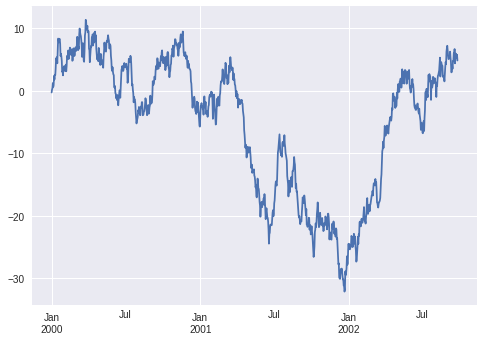

In [38]:
ts = pd.Series(np.random.randn(1000), 
               index=pd.date_range('1/1/2000', 
               periods=1000)
              )
ts = ts.cumsum()
ts.plot()

On a DataFrame, the [`plot()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html#pandas.DataFrame.plot) method is a convenience to plot all of the columns with labels

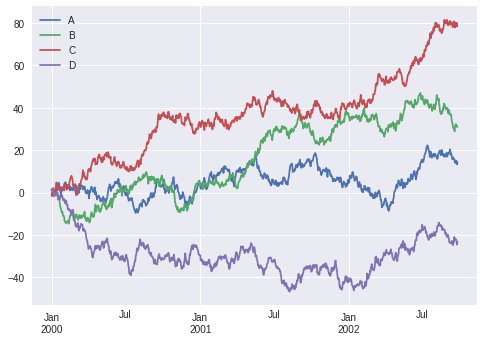

In [39]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D']) 
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

### Getting Data In/Out

::GMG::**Note:** I don't have modules for working with hdf5 and excel

 - *ImportError*: HDFStore requires [PyTables](https://www.pytables.org/), "No module named 'tables'" problem importing
 - *ModuleNotFoundError*: No module named ['openpyxl'](https://openpyxl.readthedocs.io/en/stable/)

**CSV**

[Writing to a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-store-in-csv).

In [46]:
df.to_csv('foo.csv')
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.753698,1.401657,-0.665643,0.961512
1,2000-01-02,-0.257314,1.089368,-1.756957,1.704300
2,2000-01-03,0.871123,1.261797,-0.512354,1.304057
3,2000-01-04,1.584106,1.242573,-0.775602,0.660362
4,2000-01-05,2.128608,1.334161,-0.650675,1.027813
5,2000-01-06,1.407144,-0.009425,-0.295663,-0.575768
6,2000-01-07,0.415978,-0.805561,0.914384,-1.860696
7,2000-01-08,0.178708,-0.667387,-0.064504,-1.621667
8,2000-01-09,0.847676,0.674844,1.073673,-0.960786
9,2000-01-10,0.797534,0.637462,0.824567,-0.785763


**HDF5**

Reading and writing to [HDFStores](http://pandas.pydata.org/pandas-docs/stable/io.html#io-hdf5).

Writing to a HDF5 Store.

In [41]:
df.to_hdf('foo.h5','df')
pd.read_hdf('foo.h5','df')

ImportError: ignored

**Excel**

Reading and writing to [MS Excel](http://pandas.pydata.org/pandas-docs/stable/io.html#io-excel).

Writing to an excel file.

In [42]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

ModuleNotFoundError: ignored

### Gotchas

If you are attempting to perform an operation you might see an exception like:

In [43]:
if pd.Series([False, True, False]):
    print("I was true")

ValueError: ignored

See [Comparisons](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-compare) for an explanation and what to do.

See [Gotchas](http://pandas.pydata.org/pandas-docs/stable/gotchas.html#gotchas) as well.